## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT
import matplotlib.pyplot as plt
import seaborn as sns

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

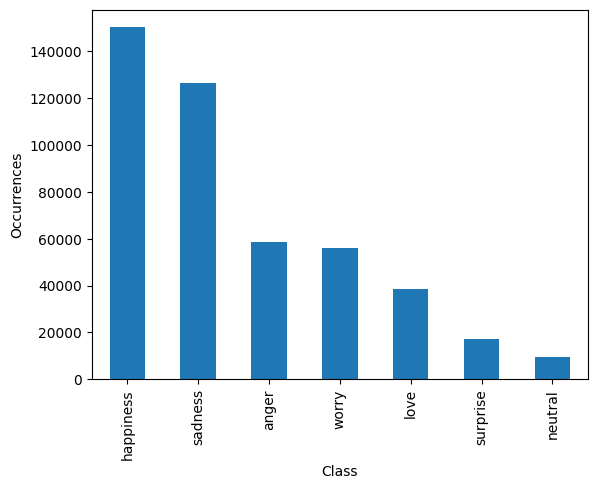

In [2]:
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.xlabel("Class")
plt.ylabel("Occurrences")
plt.savefig(f'{PROJECT_ROOT}/doc/Documentation/class_distribution.png')
plt.show()

### Length distribution
The length was capped at 400 to make the graph more readable, nearly all sequences are shorter than 400.

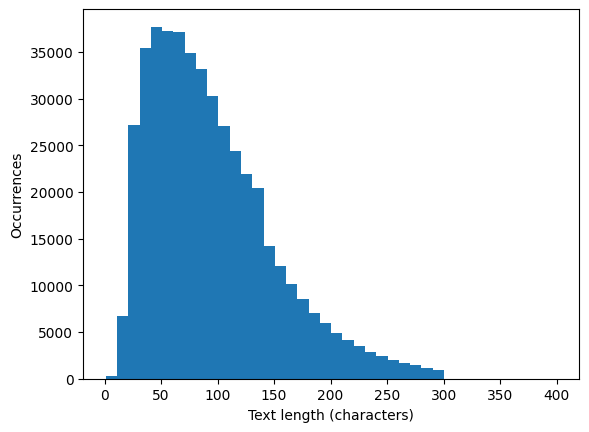

In [3]:
plt.hist([min(len(x), 400) for x in dataset.data['text']], bins=40)
plt.xlabel("Text length (characters)")
plt.ylabel("Occurrences")
plt.savefig(f'{PROJECT_ROOT}/doc/Documentation/length_distribution.png')
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor
from dmml_project import PROJECT_ROOT

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
9728      i am a bit boring although i speak happily but...
171870                        just had an orgasmic sandwich
202239                when i started a relation with a girl
158313    i was also feeling a bit jaded after leaving m...
404047    i feel ironically curious and exploring this m...
Name: text, dtype: object
After preprocessing:
  (0, 1402)	0.36102375753895777
  (0, 4874)	0.24763334355541727
  (0, 5587)	0.3364936316618045
  (0, 8592)	0.3321216967294093
  (0, 15793)	0.11947301196304742
  (0, 19938)	0.4758216241635151
  (0, 27443)	0.31708750132399915
  (0, 33373)	0.23052530630387896
  (0, 43821)	0.36753599123485775
  (0, 44624)	0.23528209506916006
  (1, 33661)	0.7285642018690353
  (1, 40419)	0.6849775206201556
  (2, 18294)	0.5709680949955664
  (2, 38689)	0.6809733238928015
  (2, 44398)	0.45855290495593126
  (3, 1388)	0.1794854847739136
  (3, 4874)	0.16599433319663465
  (3, 11194)	0.2581768104591319
  (3, 14225)	0.23522133779432508
  (3, 15373)	0.2144

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

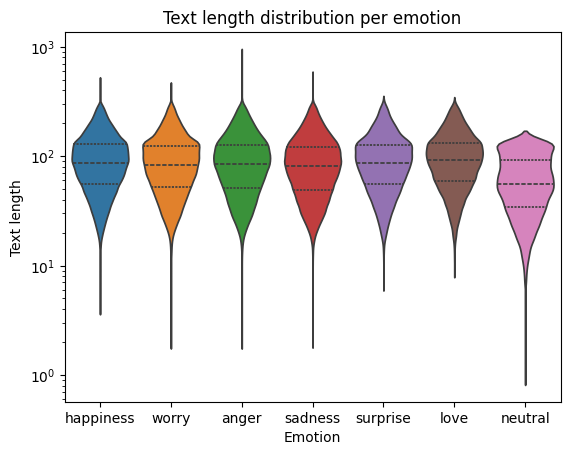

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()